# Data exploration

This section contains some intial data exploration to get a better idea of the data we will be dealing with and understand what, if any, precprocessing steps needs to be done.

## Inspect the files

In [1]:
import pandas as pd

# Load the files
exisiting_customers = pd.read_excel('data/existing-customers.xlsx')
potential_customers = pd.read_excel('data/potential-customers.xlsx')

/Users/tobiaswilfert/Documents/University/DM/data-mining-assignments/venv/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/tobiaswilfert/Documents/University/DM/data-mining-assignments/venv/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


### Check the dimensions of the datasets

In [2]:
# Check the size of the two dataframes against each other
print(f"The shapes of the two datasets:")
print(f"\t Exisiting customers: {exisiting_customers.shape}")
print(f"\t Potential customers: {potential_customers.shape}")

print(f"The hearders of the two datasets:")
print(f"\t Exisiting customers: {list(exisiting_customers)}")
print(f"\t Potential customers: {list(potential_customers)}")

The shapes of the two datasets:
	 Exisiting customers: (32561, 15)
	 Potential customers: (16281, 14)
The hearders of the two datasets:
	 Exisiting customers: ['RowID', 'age', 'workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'class']
	 Potential customers: ['RowID', 'age', 'workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']


### Check the first few entries
This is done inorder to get an idea for the datasets

In [3]:
exisiting_customers.head(10)

,RowID,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,Row0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,Row1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,Row2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,Row3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,Row4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,Row5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,Row6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,Row7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,Row8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,Row9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
potential_customers.head(10)

,RowID,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,Row0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,Row1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,Row2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,Row3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,Row4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States
5,Row5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States
6,Row6,29,NaN,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States
7,Row7,63,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States
8,Row8,24,Private,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States
9,Row9,55,Private,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States


### Check if there are any missing values

In [5]:
print(f"The number of NaN entries in:")
print(f"\t exisiting_customers: {exisiting_customers.isnull().sum().sum()}")
print(f"\t potential_customers: {potential_customers.isnull().sum().sum()}")

The number of NaN entries in:
	 exisiting_customers: 4262
	 potential_customers: 2203


In [6]:
exisiting_customers[exisiting_customers.isnull().any(axis=1)]

,RowID,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
14,Row14,40,Private,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,NaN,>50K
27,Row27,54,NaN,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
38,Row38,31,Private,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,NaN,>50K
51,Row51,18,Private,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,NaN,<=50K
61,Row61,32,NaN,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,NaN,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,Row32530,35,NaN,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,>50K
32531,Row32531,30,NaN,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,Row32539,71,NaN,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,>50K
32541,Row32541,41,NaN,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [7]:
potential_customers[potential_customers.isnull().any(axis=1)]

,RowID,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
4,Row4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States
6,Row6,29,NaN,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States
13,Row13,58,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States
19,Row19,40,Private,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,NaN
22,Row22,72,NaN,7th-8th,4,Divorced,NaN,Not-in-family,White,Female,0,0,6,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16208,Row16208,21,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States
16239,Row16239,73,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,25,Canada
16251,Row16251,81,NaN,Assoc-voc,11,Married-civ-spouse,NaN,Husband,White,Male,2936,0,20,United-States
16265,Row16265,50,Local-gov,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,NaN


#### Check which percentage of rows contain NaN values

In [8]:
print(f"{exisiting_customers[exisiting_customers.isnull().any(axis=1)].shape[0] / exisiting_customers.shape[0]*100}% of rows contain NaN in exisiting_customers.")
print(f"{potential_customers[potential_customers.isnull().any(axis=1)].shape[0] / potential_customers.shape[0]*100}% of rows contain NaN in potential_customers.")

7.367709836921471% of rows contain NaN in exisiting_customers.
7.499539340335361% of rows contain NaN in potential_customers.


## Observations

- The two datasets are very similar the only difference being that exisiting_customers has an extra row 'class' which indicates if the person makes more than 50k annually.

- There are a decent number of missing values in both datasets that need to be delt with. TODO: Need to decide how to deal with them.

# Interesting Questions

(For now lets ignore rows that are incomplete, so no tricks used to guess the values)

- **How does the distribution of the individual features look like?**  
Gives us an idea on which groups we need to focus / be aware of.  
- **Are the features independent of each other?**  
Knowing this would open up the door for an interesting prediction approach, if they are not independent this is still interesting to know.

## How are the individual features distributed?

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'education-num'}>],
       [<Axes: title={'center': 'capital-gain'}>,
        <Axes: title={'center': 'capital-loss'}>],
       [<Axes: title={'center': 'hours-per-week'}>, <Axes: >]],
      dtype=object)

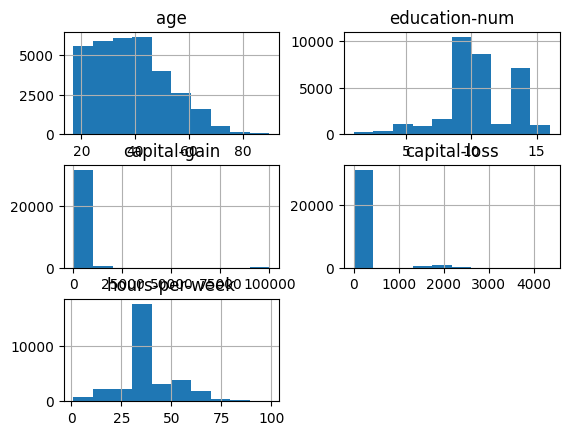

In [12]:
# Check all the numerical values
import matplotlib.pyplot as plt
exisiting_customers.hist()

<Axes: >

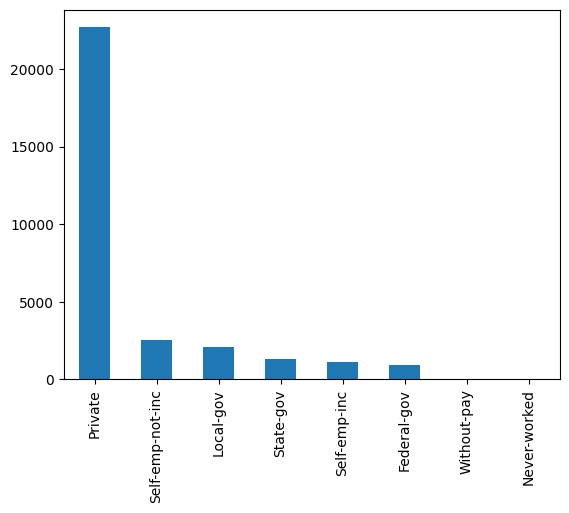

In [16]:
exisiting_customers.workclass.value_counts().plot.bar()

<Axes: >

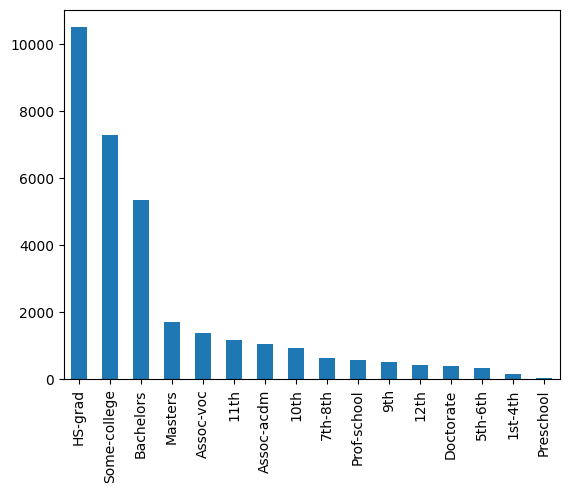

In [17]:
exisiting_customers.education.value_counts().plot.bar()

<Axes: >

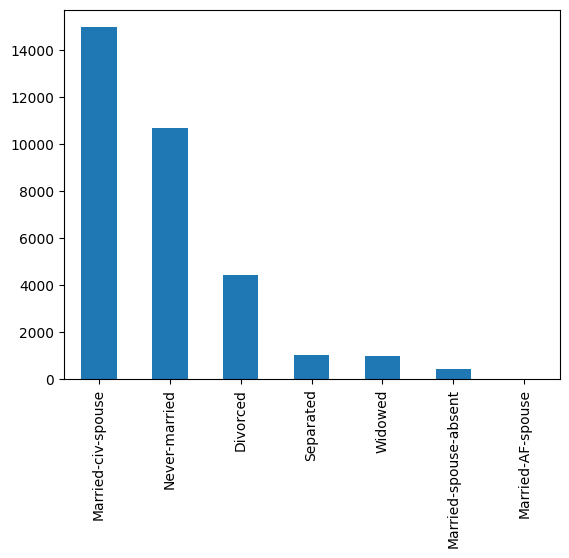

In [21]:
exisiting_customers["marital-status"].value_counts().plot.bar()

<Axes: >

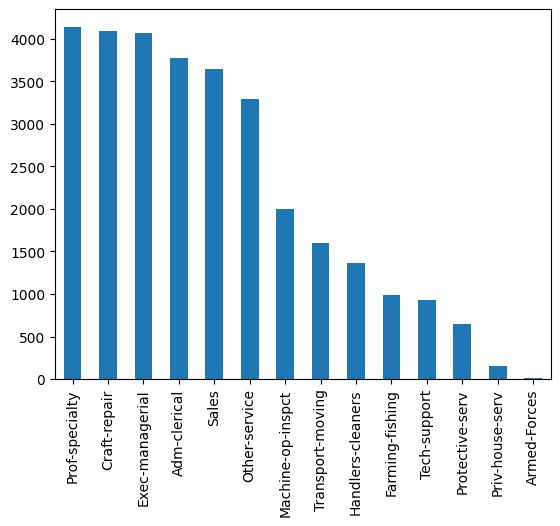

In [24]:
exisiting_customers.occupation.value_counts().plot.bar()

<Axes: >

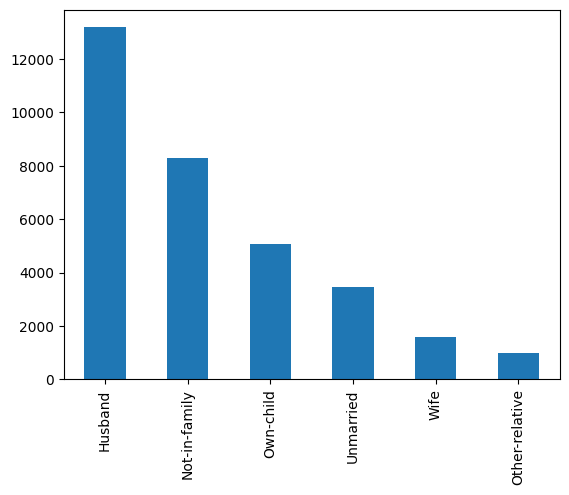

In [25]:
exisiting_customers.relationship.value_counts().plot.bar()

<Axes: >

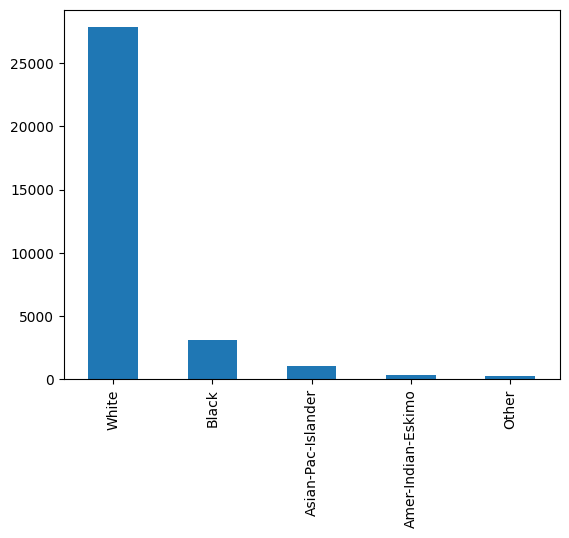

In [26]:
exisiting_customers.race.value_counts().plot.bar()

<Axes: >

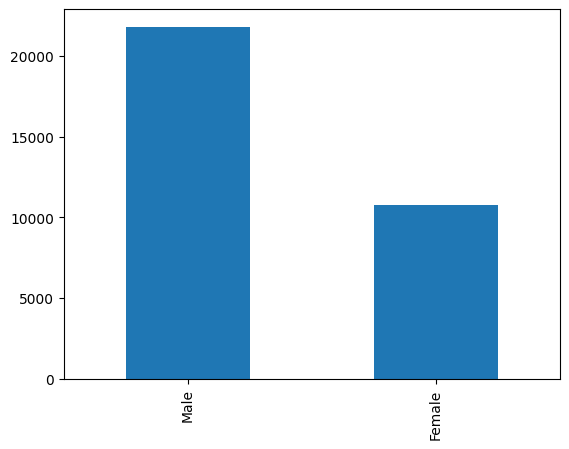

In [27]:
exisiting_customers.sex.value_counts().plot.bar()

<Axes: >

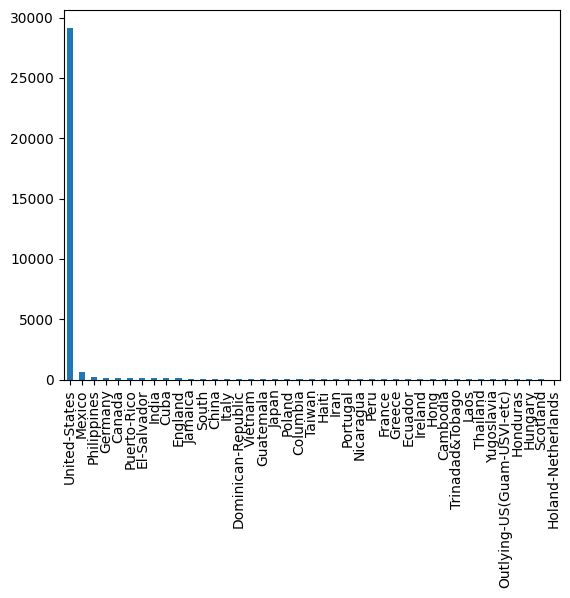

In [28]:
exisiting_customers["native-country"].value_counts().plot.bar()

<=50K    24720
>50K      7841
Name: class, dtype: int64


<Axes: >

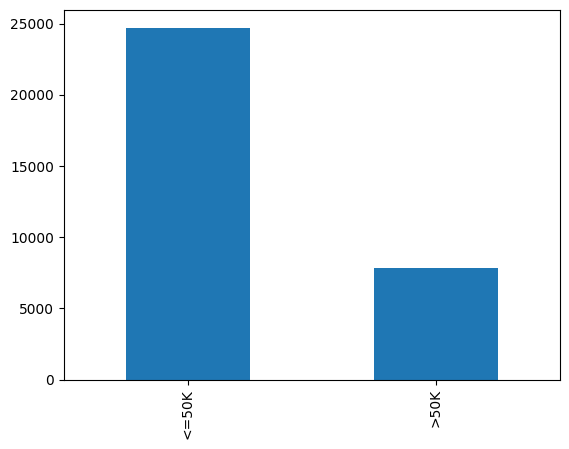

In [47]:
temp = exisiting_customers["class"].value_counts()
print(temp)
temp.plot.bar()

***IMPORTANT CONCLUSION***: 24720/(24720+7841) = 0,759 of the existing customers fall into the lower than 50k group, so this percentage becomes the base line.

## Check for independence

<Axes: xlabel='sex,class'>

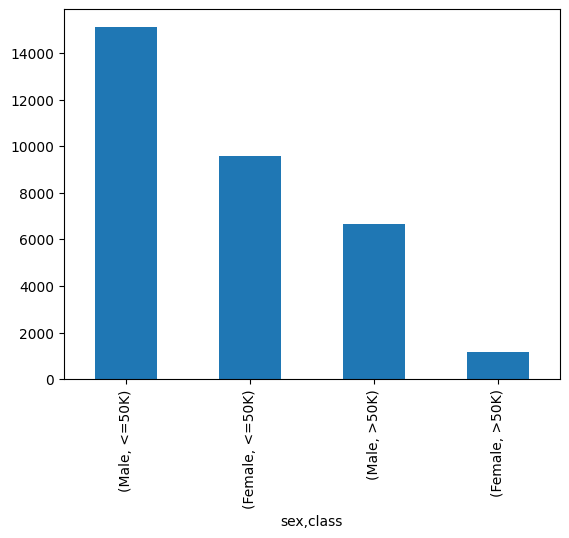

In [32]:
exisiting_customers[["sex","class"]].value_counts().plot.bar()


In [43]:
import numpy as np
import scipy.stats
from scipy.stats import chi2

ct_table_ind=pd.crosstab(exisiting_customers["sex"], exisiting_customers["class"])
print('contingency_table :\n',ct_table_ind)

chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(ct_table_ind)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

contingency_table :
 class   <=50K  >50K
sex                
Female   9592  1179
Male    15128  6662
chi2 statistic:     1517.8
p-value:            0
degrees of freedom: 1
expected frequencies:
 [[ 8177.24025675  2593.75974325]
 [16542.75974325  5247.24025675]]


In [44]:
ct_table_ind=pd.crosstab(exisiting_customers["race"], exisiting_customers["class"])
print('contingency_table :\n',ct_table_ind)

chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(ct_table_ind)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

contingency_table :
 class               <=50K  >50K
race                           
Amer-Indian-Eskimo    275    36
Asian-Pac-Islander    763   276
Black                2737   387
Other                 246    25
White               20699  7117
chi2 statistic:     330.92
p-value:            2.306e-70
degrees of freedom: 4
expected frequencies:
 [[  236.10822763    74.89177237]
 [  788.79886981   250.20113019]
 [ 2371.71094254   752.28905746]
 [  205.74060993    65.25939007]
 [21117.64135008  6698.35864992]]


## Check if the features are independent


In [3]:
import numpy as np
import scipy.stats
from scipy.stats import chi2

ct_table_ind=pd.crosstab(exisiting_customers["race"], exisiting_customers["education-num"])
print('contingency_table :\n',ct_table_ind)

chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(ct_table_ind)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

contingency_table :
 education-num       1    2    3    4    5    6    7    8     9     10    11  \
race                                                                          
Amer-Indian-Eskimo   0    4    2    9    5   16   14    5   119    79    19   
Asian-Pac-Islander   6    5   18   11    9   13   21    9   226   208    38   
Black                5   16   21   56   89  133  153   70  1174   746   112   
Other                2    9   13   17    8    9   10   14    78    51     6   
White               38  134  279  553  403  762  977  335  8904  6207  1207   

education-num        12    13    14   15   16  
race                                           
Amer-Indian-Eskimo    8    21     5    2    3  
Asian-Pac-Islander   29   289    88   41   28  
Black               107   330    86   15   11  
Other                 8    33     7    4    2  
White               915  4682  1537  514  369  
chi2 statistic:     730.67
p-value:            5.5473e-116
degrees of freedom: 60
expecte